In [1]:
import pandas as pd
import chatminer
from chatminer.chatparsers import WhatsAppParser
import chatminer.visualizations as vis
import matplotlib.pyplot as plt

In [10]:
parser = WhatsAppParser("adebusola.txt")
parser.parse_file()
df = parser.parsed_messages.get_df()

09.03.2023 20:16:49 INFO     
            Depending on the platform, the message format in chat logs might not be
            standardized accross devices/versions/localization and might change over
            time. Please report issues including your message format via GitHub.
            
09.03.2023 20:16:49 INFO     Initialized parser.
09.03.2023 20:16:49 INFO     Starting reading raw messages...
09.03.2023 20:16:49 INFO     Inferred date format: month/day/year
09.03.2023 20:16:49 INFO     Finished reading 1989 raw messages.
09.03.2023 20:16:49 INFO     Starting parsing raw messages...
100%|██████████| 1989/1989 [00:00<00:00, 2859.52it/s]
09.03.2023 20:16:50 INFO     Finished parsing raw messages.


In [5]:
chatminer.__version__

'0.3.0'

In [12]:
df.tail(10)

timestamp                                      author  \
1979 2022-08-03 20:14:00  Pragmatist Global Analytics and Consulting   
1980 2022-08-03 20:14:00  Pragmatist Global Analytics and Consulting   
1981 2022-08-03 19:30:00                                 Adebusola R   
1982 2022-08-03 18:49:00  Pragmatist Global Analytics and Consulting   
1983 2022-07-27 08:19:00  Pragmatist Global Analytics and Consulting   
1984 2022-07-27 08:19:00  Pragmatist Global Analytics and Consulting   
1985 2022-07-27 08:19:00  Pragmatist Global Analytics and Consulting   
1986 2022-07-26 21:54:00                                 Adebusola R   
1987 2022-07-26 21:54:00                                 Adebusola R   
1988 2022-07-27 03:16:00                                      System   

                                                message    weekday  hour  \
1979                                 Got my system back  Wednesday    20   
1980                                                Yes  Wednesday    20   
1981                        I know... it’s soo smooth 🔥  Wednesday    19   
1982                    OMG I'm fascinated by her skill  Wednesday    18   
1983        Thought you are going to speak with me Deji  Wednesday     8   
1984                                       Good morning  Wednesday     8   
1985                                      Not at all ma  Wednesday     8   
1986  You had abandoned me with my R and python and ...    Tuesday    21   
1987                                                IBK    Tuesday    21   
1988  Messages and calls are end-to-end encrypted. N...  Wednesday     3   

      words  letters  
1979      4       18  
1980      1        3  
1981      6       27  
1982      6       31  
1983      9       43  
1984      2       12  
1985      4       13  
1986     13       57  
1987      1        3  
1988     25      139

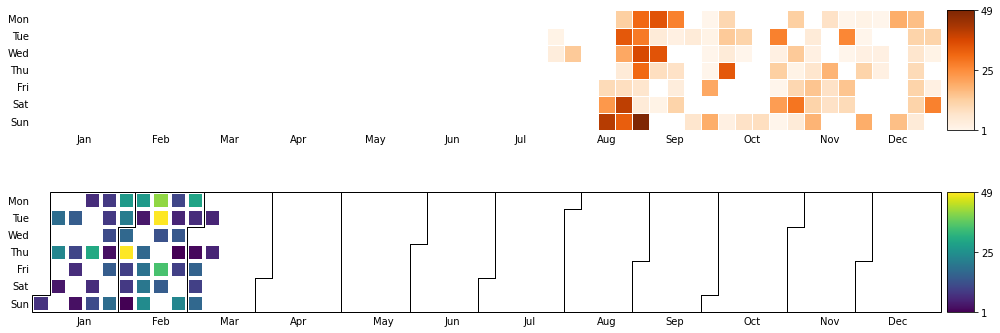

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(14, 6))
ax[0] = vis.calendar_heatmap(df, year=2022, cmap='Oranges', ax=ax[0])
ax[1] = vis.calendar_heatmap(df, year=2023, cmap='viridis',linewidth=4, monthly_border=True, ax=ax[1])

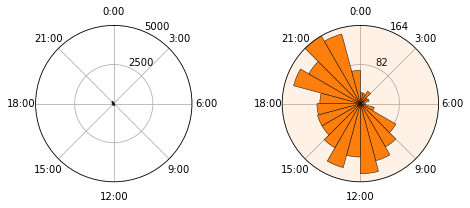

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': 'polar'})
ax[0] = vis.sunburst(df, highlight_max=True, isolines=[2500, 5000], isolines_relative=False, ax=ax[0])
ax[1] = vis.sunburst(df, highlight_max=False, isolines=[0.5, 1], color='C1', ax=ax[1])

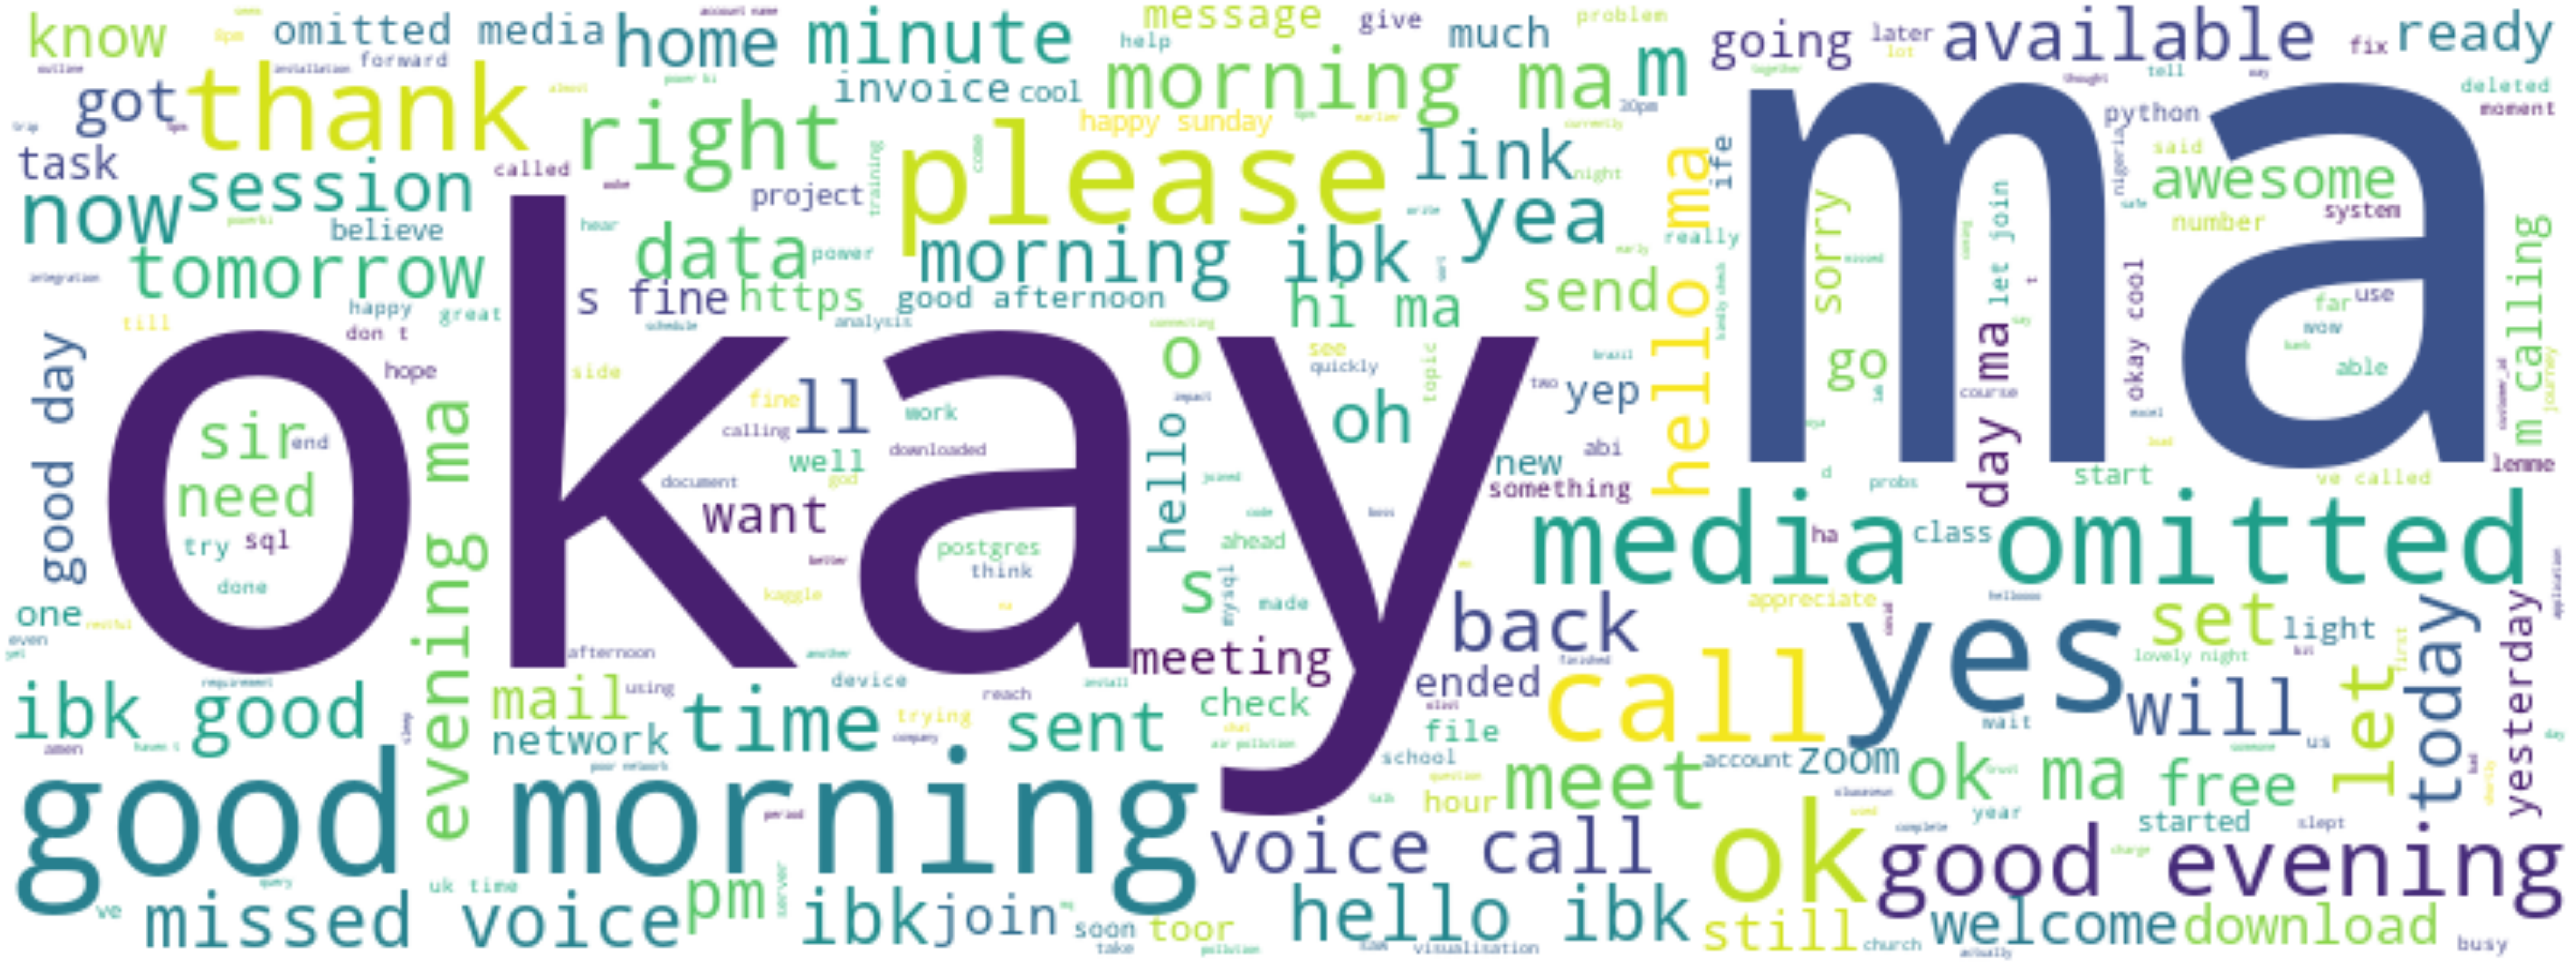

In [15]:
fig, ax = plt.subplots(figsize=(100, 50))
stopwords = ['these', 'are', 'stopwords']
kwargs={"background_color": "white", "width": 800, "height": 300, "max_words": 500}
ax = vis.wordcloud(df, ax=ax, stopwords=stopwords, **kwargs)

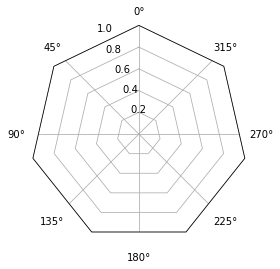

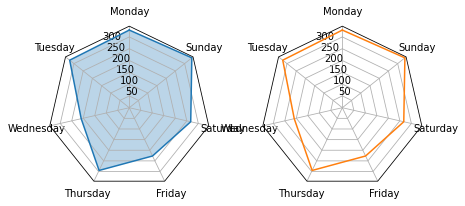

In [16]:
if not vis.is_radar_registered():
	vis.radar_factory(7, frame="polygon")
fig, ax = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': 'radar'})
ax[0] = vis.radar(df, ax=ax[0])
ax[1] = vis.radar(df, ax=ax[1], color='C1', alpha=0)